<a href="https://colab.research.google.com/github/bin010203/Machine-Learning/blob/main/A1_7%E6%9C%89%E7%89%B9%E5%BE%B5%E7%B8%AE%E6%94%BE_%E7%B7%9A%E6%80%A7%E5%9B%9E%E6%AD%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 實作7：簡單線性回歸-有特徵縮放

### (0)掛載雲端硬碟

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### (1)import必要的套件

In [ ]:
#/content/drive/MyDrive/Colab Notebooks/kaiu.ttf

In [ ]:
import numpy as np
from IPython import display
import matplotlib.pyplot as plt
import matplotlib.font_manager as plt_font
#要記得改為自己的自行檔案路徑
twfont1 = plt_font.FontProperties(
    fname="")

### (2)定義特徵縮放的函數

In [ ]:
# (data-data.min())/(data.max()-data.min())
# (data-data.mean())/data.std()

In [ ]:
#參數kind預設為0，做標準化；若kind設為1，做歸一化
def FeatureScaling(data,kind=0):
  if kind==1:
    return 
  else:
    return 



### (3)將原始資料分為訓練資料集和驗證資料集

In [ ]:
#由SalesVolume.csv檔案載入資料集
data= np.loadtxt(
    "/content/drive/MyDrive/Colab Notebooks/SalesVolume.csv"
    ,delimiter=",")
data

array([[ 24.,  22.,  15.,   4.,   9.,  20.,   5.,   3.,  17.,  19.,  13.,
         10.,  12.,  11.,  16.,  27.,  16.,  16.,   6.,  20.],
       [591., 543., 410., 310., 319., 520., 338., 330., 501., 508., 399.,
        331., 390., 390., 431., 660., 409., 430., 323., 524.]])

In [ ]:
data[0]

array([24., 22., 15.,  4.,  9., 20.,  5.,  3., 17., 19., 13., 10., 12.,
       11., 16., 27., 16., 16.,  6., 20.])

In [ ]:
#第0列為廣告推播次數，並做特徵縮放，
#第2參數設為0是標準化，設為1是歸一化
data_x=FeatureScaling(data[0],0)
data_y=data[1]#第2列為商品銷售數量
#訓練資料集12筆
train_x=data_x[:12]
train_y=data_y[:12]
#驗證資料集8筆
valid_x=data_x[12:]
valid_y=data_y[12:]

In [ ]:
data_x

array([ 1.47680664,  1.17387194,  0.11360051, -1.55254031, -0.79520357,
        0.87093725, -1.40107296, -1.70400766,  0.41653521,  0.7194699 ,
       -0.18933418, -0.64373623, -0.34080153, -0.49226888,  0.26506786,
        1.93120868,  0.26506786,  0.26506786, -1.24960562,  0.87093725])

### (4)隨機初始化偏值b，權重w 

In [ ]:
b=np.random.rand()
w=np.random.rand()
print(b,w)

0.5013080096956192 0.08675280759662007


## (5)定義迴歸模型的線性函數

In [ ]:
def F(x):
    return b+w*x

## (6)定義損失函數LOSS Funcation

In [ ]:
def Loss(x,y):
    return 0.5*np.sum((y-F(x))**2)

## (7)設定學習率和權重更新次數

In [ ]:
#學習率，不同特徵縮放方式，學習率需要調整
ETA = 0.0001
Step_Loss=[]
Step_b=[]
Step_w=[]

## (8)開始訓練模型

In [ ]:
for epoch in range(10000):
    b=b-ETA*np.sum(F(train_x)-train_y)
    w=w-ETA*np.sum((F(train_x)-train_y)*train_x)
    if epoch%100==99:
        current_loss=Loss(train_x,train_y)
        print("訓練次數:",epoch+1,"\nb:",b,
              "\nw:",w,"\n損失函數:",current_loss)
        Step_Loss.append(current_loss)
        Step_b.append(b)
        Step_w.append(w)
        display.clear_output(wait=True)

訓練次數: 10000 
b: 436.17274808933854 
w: 88.5575786722732 
損失函數: 5256.1612850843685


###def F(x)=b+w*x ,偏值b，權重w(斜率)

### (9)畫圖檢查模型訓練結果

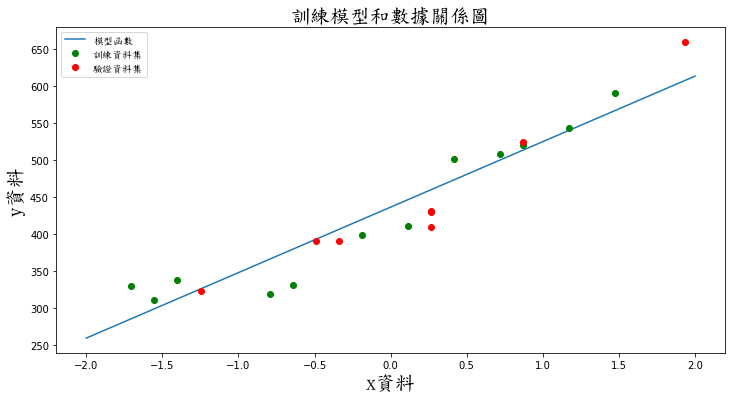

In [ ]:
plt.figure(figsize=(12,6))
plt.title("訓練模型和數據關係圖",
          fontproperties=twfont1,fontsize=20) 
plt.xlabel("x資料",fontproperties=twfont1,fontsize=20) 
plt.ylabel("y資料",fontproperties=twfont1,fontsize=20)
#x軸刻度範圍，不同特徵縮放方式需要調整
x = np.linspace(-2,2, 2000)
plt.plot(x, F(x),label="模型函數")
plt.plot(train_x, train_y, 'go',label="訓練資料集")
plt.plot(valid_x, valid_y, 'ro',label="驗證資料集")
plt.legend(prop=twfont1)
plt.show()

### (10)觀察Loss值隨訓練次數的變化

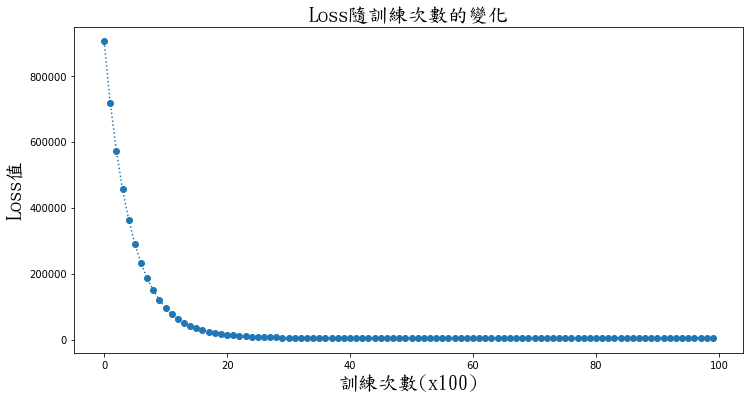

In [ ]:
plt.figure(figsize=(12,6))
plt.title("Loss隨訓練次數的變化",
          fontproperties=twfont1,fontsize=20) 
plt.xlabel("訓練次數(x100)",
           fontproperties=twfont1,fontsize=20) 
plt.ylabel("Loss值",
           fontproperties=twfont1,fontsize=20)
plt.plot(Step_Loss,":o")
plt.show()

### (11)比較訓練好的迴歸模型函數在訓練資料集和驗證資料集的每筆平均Loss值

In [ ]:
print("訓練資料集對回歸模型的每筆平均Loss值",
      Loss(train_x, train_y)/np.size(train_x))
print("驗證資料集對回歸模型的每筆平均Loss值",
      Loss(valid_x, valid_y)/np.size(valid_x))

訓練資料集對回歸模型的每筆平均Loss值 438.0134404236974
驗證資料集對回歸模型的每筆平均Loss值 464.75343219652586


### 動畫顯示迴歸係數的移動路徑

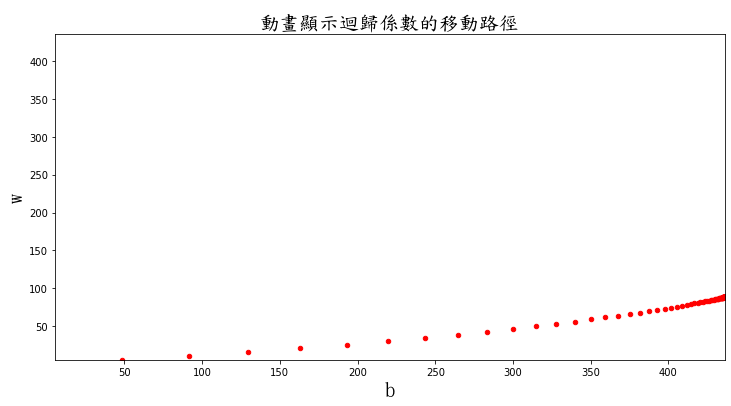

99


In [ ]:
for i in range(len(Step_b)):
    plt.figure(figsize=(12,6))
    plt.title("動畫顯示迴歸係數的移動路徑",
              fontproperties=twfont1,fontsize=20) 
    plt.xlim(np.min(np.array([Step_b,Step_w])),
             np.max(np.array([Step_b,Step_w])))
    plt.ylim(np.min(np.array([Step_b,Step_w])),
             np.max(np.array([Step_b,Step_w])))
    plt.xlabel("b",fontproperties=twfont1,fontsize=20) 
    plt.ylabel("w",fontproperties=twfont1,fontsize=20)
    plt.scatter(Step_b[:i], Step_w[:i], s=20,color='r')
    plt.pause(0.1)
    print(i)
    display.clear_output(wait=True)

### (12)顯示迴歸係數(權重和偏值)在損失函數等高線分布圖的移動路徑

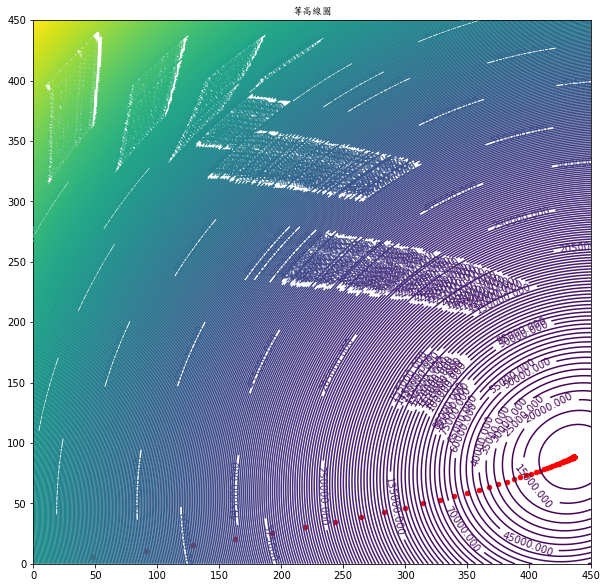

In [ ]:
#取b和w的網格範圍，不同的特徵縮放，網格範圍要調整
b=np.linspace(0,450,200)
w=np.linspace(0,450,200)
#計算每一個網格點對應的損失函數值
L=np.zeros((200,200)) 
for i in range(200):
  for j in range(200):
    L[j][i]=0.5*np.sum(
        (train_y-(b[i]+w[j]*train_x))**2)
#鋪設網格
b,w=np.meshgrid(b,w)
# 開啟繪圖區域
plt.figure(figsize=(10,10))
CS=plt.contour(b,w,L,500)
plt.clabel(CS,inline=1,fontsize=10)
plt.scatter(Step_b[0:], Step_w[0:], s=20,color='r')
plt.title('等高線圖',fontproperties=twfont1)
plt.show()